In [1]:
import uclchem
import os

In [2]:
# set a parameter dictionary for phase 1 collapse model

out_species = ["SO", "CO"]
param_dict = {
    "initialDens": 1e4,  # starting density
    "initialTemp": 10.0,  # temperature of gas
    "initialBaseAv": 2.9287,  # visual extinction at cloud edge.
    'initialRadfield': 1,  # initial radiation field strength
    
    'tempRate': 0,
    'densRate': 0,
    'baseAvRate': 0,
    'radfieldRate': 0,

    'evolvingphysicalparams': True,
    'useavdirectly': True,
    
    "finalTime": 1.0e6,  # final time
    "rout": 0.1,  # radius of cloud in pc
    "endAtFinalDensity": False,  # stop at finalTime
    "freefall": False,  # don't increase density in freefall
    "outputFile": "../examples/test-output/static-full.dat",  # full UCLCHEM output
    "abundSaveFile": "../examples/test-output/startstatic.dat",  # save final abundances to file
}
# Ensure the output directory is present:
if not os.path.exists("../examples/test-output/"):
    os.makedirs("../examples/test-output/")

result = uclchem.model.cloud(param_dict=param_dict, out_species=out_species)
print(result)

[0, 6.242987896728668e-10, 2.3432143919538124e-05]


In [3]:
result_df = uclchem.analysis.read_output_file("../examples/test-output/static-full.dat")
result_df.iloc[-5:]

,Time,Density,gasTemp,dustTemp,Av,radfield,zeta,point,H,H+,...,@OCS,@C4N,@SIC3,@SO2,@S2,@HS2,@H2S2,E-,BULK,SURFACE
42,600000.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000016,3.086080e-10,...,7.826970e-10,8.730540e-13,1.649530e-29,4.271250e-14,1.568450e-11,7.194470e-12,6.563830e-12,2.516270e-08,0.000474,0.000005
43,700000.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000016,3.322470e-10,...,1.031270e-09,9.857910e-13,1.738960e-29,7.896250e-14,2.661030e-11,1.286160e-11,1.199330e-11,2.348270e-08,0.000505,0.000005
44,800000.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000016,3.500530e-10,...,1.282590e-09,1.069150e-12,1.823890e-29,1.290760e-13,3.950050e-11,2.037640e-11,2.132360e-11,2.252730e-08,0.000532,0.000005
45,900000.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000016,3.642590e-10,...,1.536720e-09,1.127930e-12,1.902820e-29,1.857200e-13,5.279800e-11,2.902610e-11,3.545670e-11,2.212850e-08,0.000554,0.000005
46,1000000.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000016,3.759010e-10,...,1.790660e-09,1.167020e-12,1.974460e-29,2.399100e-13,6.509340e-11,3.782330e-11,5.451250e-11,2.206400e-08,0.000572,0.000005


In [4]:
conservation = uclchem.analysis.check_element_conservation(
    result_df, element_list=["H", "N", "C", "O", "S"]
)
print("Percentage change in total abundances:")
print(conservation)

Percentage change in total abundances:
{'H': '0.000%', 'N': '0.000%', 'C': '0.000%', 'O': '0.000%', 'S': '0.000%'}


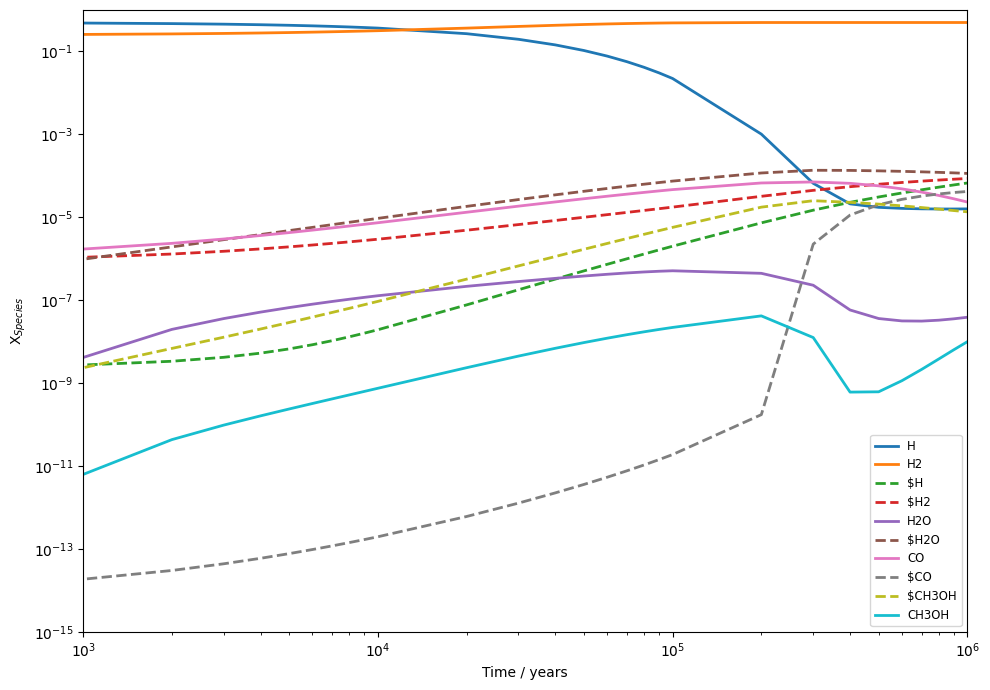

In [5]:
species = ["H", "H2", "$H", "$H2", "H2O", "$H2O", "CO", "$CO", "$CH3OH", "CH3OH"]
fig, ax = uclchem.analysis.create_abundance_plot(result_df, species, figsize=(10, 7))
ax = ax.set(xscale="log", ylim=(1e-15, 1), xlim=(1e3, 1e6))